In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
#from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates


In [ ]:
#pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.6 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv("/content/AAPL_2006-01-01_to_2018-01-01 (1).csv", parse_dates=['Date'])
data.set_index('Date', inplace=True)

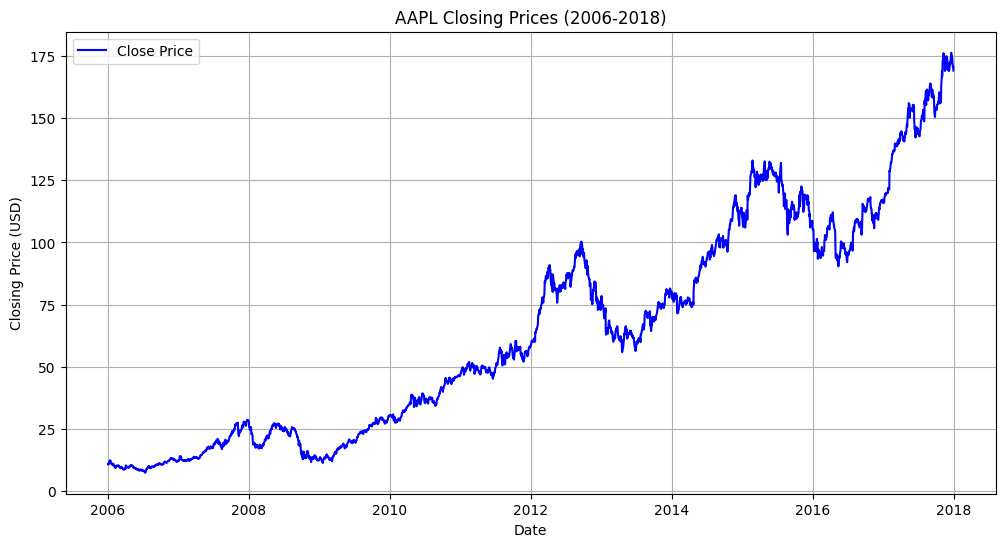

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.title('AAPL Closing Prices (2006-2018)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

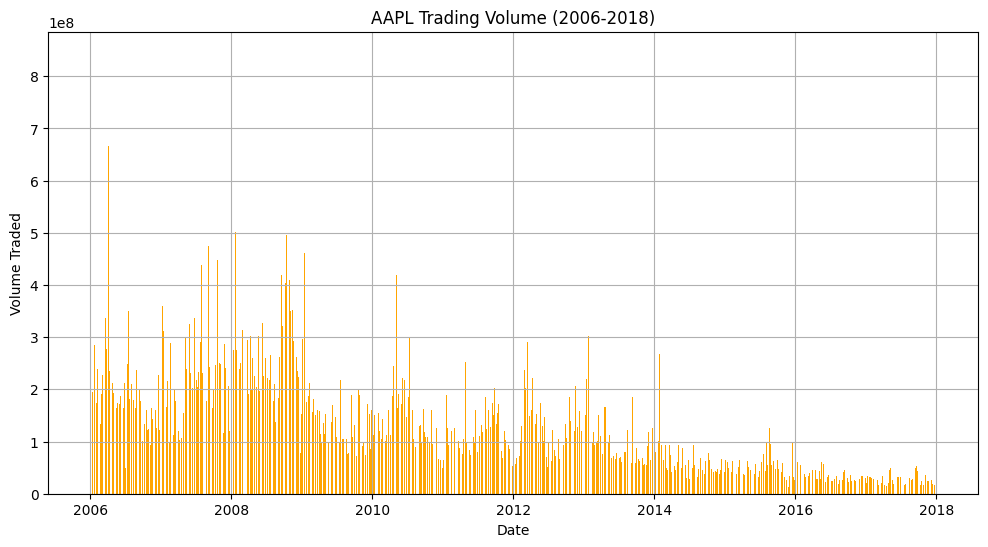

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Volume'], color='orange')
plt.title('AAPL Trading Volume (2006-2018)')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.grid(True)
plt.show()

<ipython-input-8-5d233c68133d>:6: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  data_candle['Date'] = mdates.date2num(data_candle['Date'].dt.to_pydatetime())


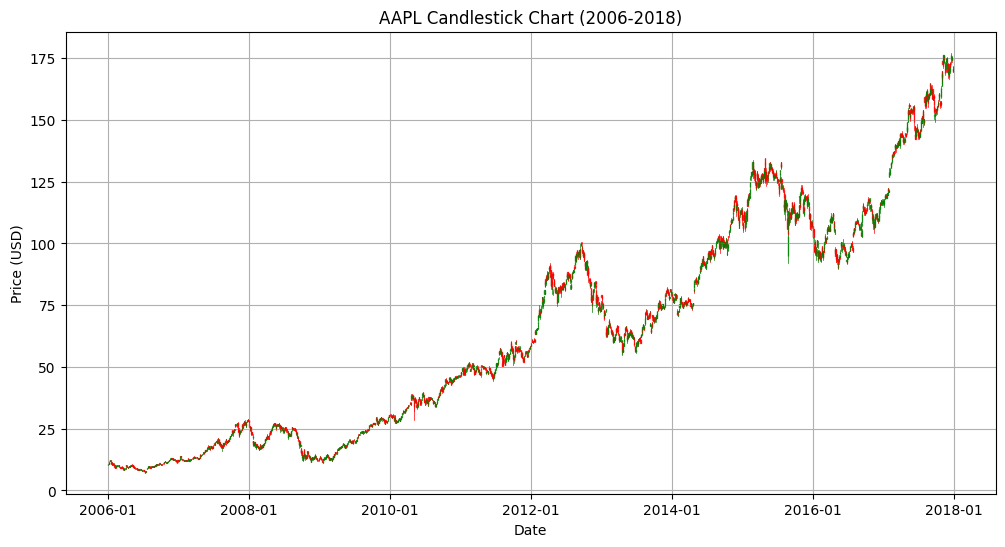

In [ ]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Prepare data for candlestick chart
data_candle = data.reset_index()
data_candle['Date'] = mdates.date2num(data_candle['Date'].dt.to_pydatetime())
ohlc = data_candle[['Date', 'Open', 'High', 'Low', 'Close']]

fig, ax = plt.subplots(figsize=(12, 6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('AAPL Candlestick Chart (2006-2018)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

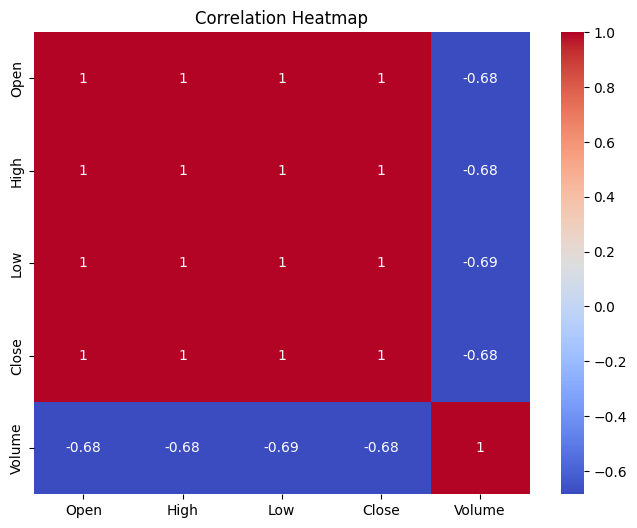

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

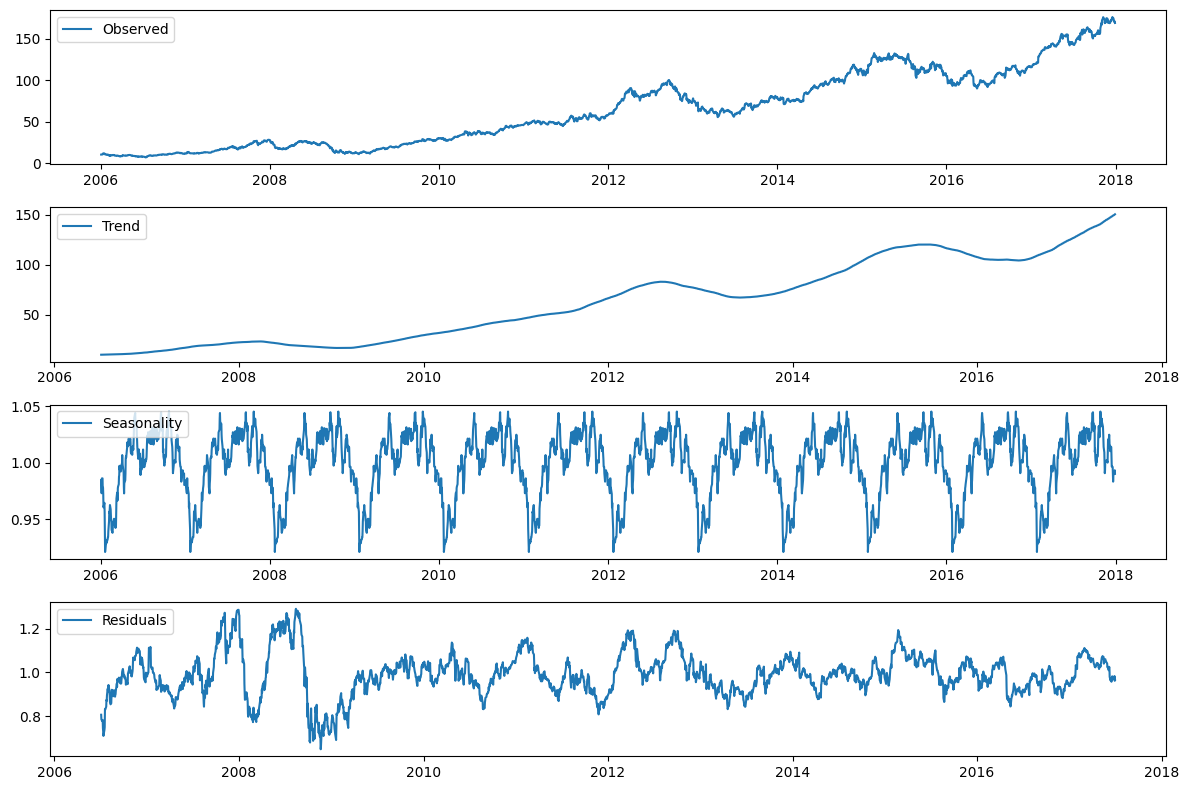

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
#data = pd.read_csv(r"C:\Users\olivi\Downloads\AAPL_2006-01-01_to_2018-01-01 (1).csv", parse_dates=['Date'], index_col='Date')

# Time-Series Decomposition
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=252)  # 252 trading days in a year

# Plotting the Decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


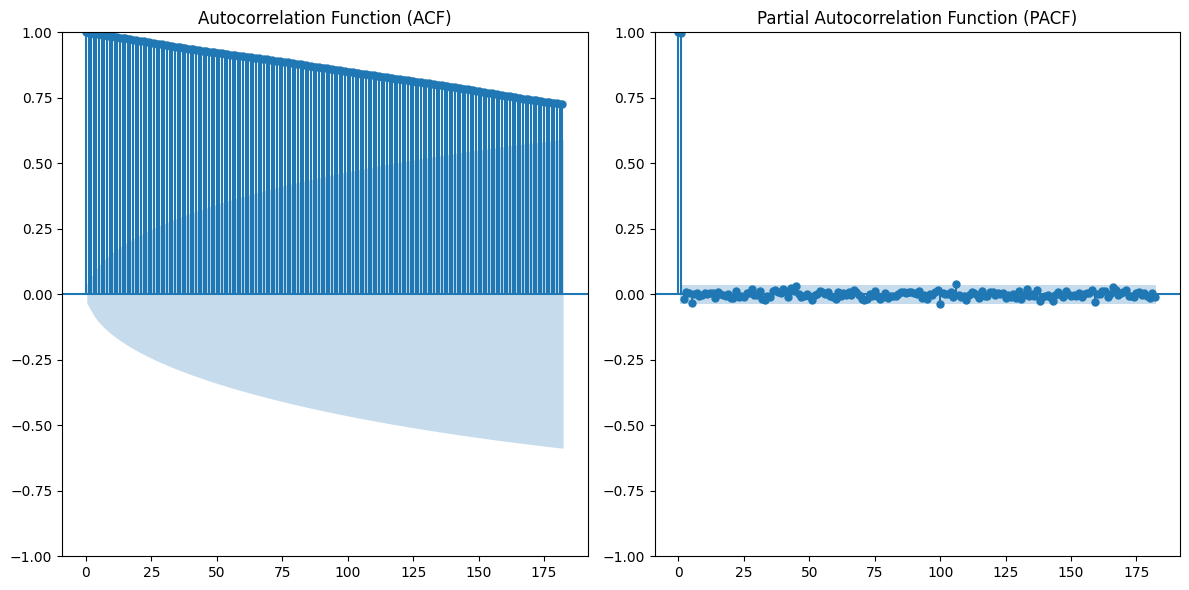

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
plt.figure(figsize=(12, 6))

# Autocorrelation Function (ACF)
plt.subplot(121)
plot_acf(data['Close'], lags=182, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Partial Autocorrelation Function (PACF)
plt.subplot(122)
plot_pacf(data['Close'], lags=182, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


##### MISSING VALUES

In [ ]:
data.isnull().sum() # check for missing values

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


###### DATA SYNCHRONOUS

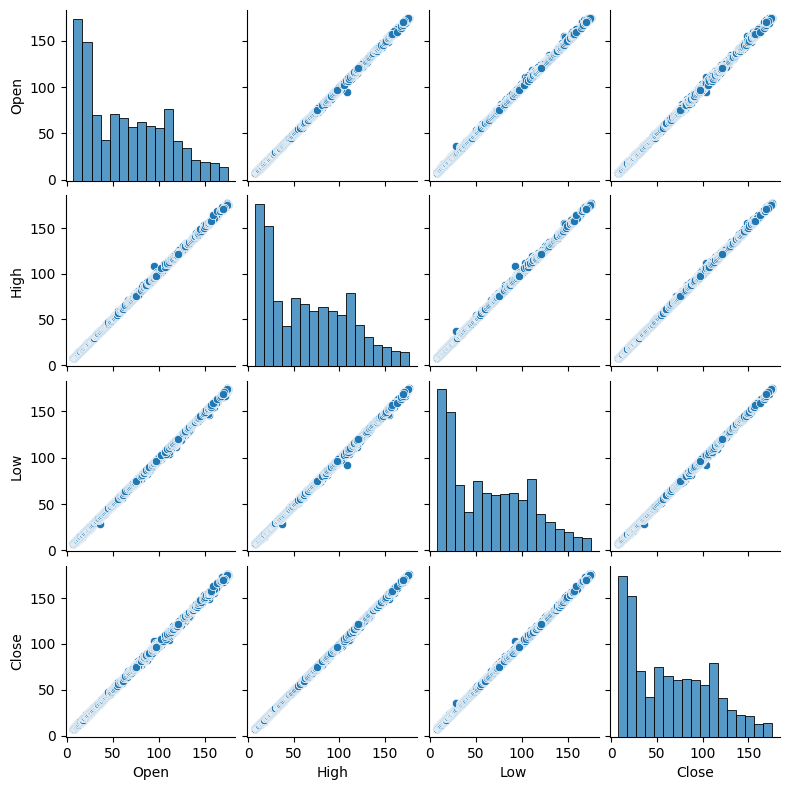

In [ ]:
# Pair plot to check correlation and synchrony between variables
sns.pairplot(data[['Open', 'High', 'Low', 'Close']], height =2)
#plt.suptitle('Pair Plot of Stock Prices', y=1.02)
plt.show()


#### Baseline model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

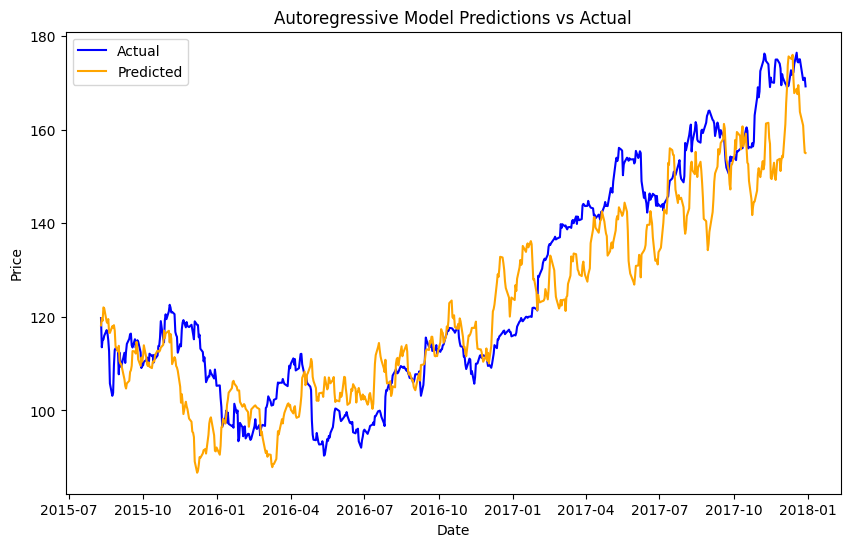

RMSE: 10.533144055467549


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
#data = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'], index_col='Date')

# We will use 'Close' prices for forecasting
close_prices = data['Close']

# Split the data into training and testing sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Fit the AutoReg model
model = AutoReg(train, lags=730)
model_fitted = model.fit()

# Make predictions
predictions = model_fitted.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Evaluate the model using RMSE
rmse = sqrt(mean_squared_error(test, predictions))

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='orange')
plt.title('Autoregressive Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print(f"RMSE: {rmse}")


WEEK 4

**RNN model**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense


In [ ]:
data = data[['Close']]

Normalize data

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

split the  data into train, validation and test

In [ ]:
train_size = int(len(scaled_data) * 0.70)
val_size = int(len(scaled_data) * 0.15)
train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size + val_size]
test_data = scaled_data[train_size + val_size:]

window for prediction

In [ ]:
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(seq_length, len(data)):
        sequences.append(data[i-seq_length:i, 0])
        labels.append(data[i, 0])
    return np.array(sequences), np.array(labels)

In [ ]:
seq_length = 60

Sequence for train, validation adn test sets

In [ ]:
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((2053, 60, 1), (392, 60, 1), (394, 60, 1))

Lest visualize train, validation and test sets portions

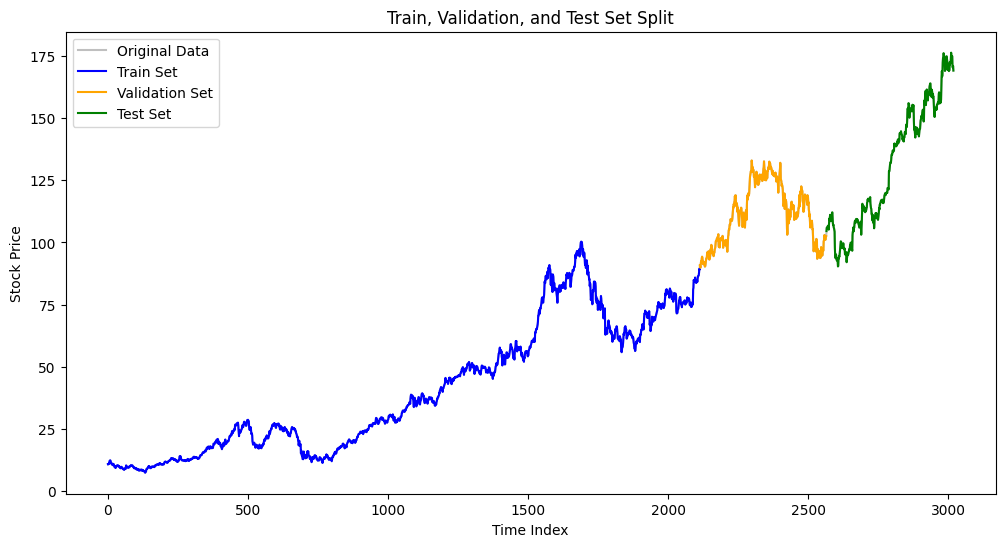

In [ ]:
data_values = data['Close'].values

# Create indices
train_idx = range(len(train_data))
val_idx = range(len(train_data), len(train_data) + len(val_data))
test_idx = range(len(train_data) + len(val_data), len(scaled_data))

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data_values, label="Original Data", color="gray", alpha=0.5)
plt.plot(train_idx, data_values[:len(train_data)], label="Train Set", color="blue")
plt.plot(val_idx, data_values[len(train_data):len(train_data) + len(val_data)], label="Validation Set", color="orange")
plt.plot(test_idx, data_values[len(train_data) + len(val_data):], label="Test Set", color="green")

# Add labels and legend
plt.title("Train, Validation, and Test Set Split")
plt.xlabel("Time Index")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


Building RNN model

In [ ]:
model = Sequential([
    SimpleRNN(200, return_sequences=True, input_shape=(seq_length, 1)),
    SimpleRNN(100, return_sequences=True),
    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compile model and train it

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 60, 200)             │          40,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 60, 100)             │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ (None, 60, 50)              │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,401 (329.69 KB)

 Trainable params: 84,401 (329.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import time
start = time.time()
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)
end = time.time()
print(f"Training time: {end - start} seconds")

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - loss: 0.0484 - val_loss: 0.0133
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 2.4882e-04 - val_loss: 0.0087
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 4.6250e-04 - val_loss: 0.0084
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 3.9383e-04 - val_loss: 0.0107
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - loss: 6.0237e-04 - val_loss: 0.0061
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 174ms/step - loss: 1.8707e-04 - val_loss: 0.0051
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - loss: 1.7483e-04 - val_loss: 0.0040
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - loss: 2.9265e-04 - val_loss: 0.0043
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - loss: 1.8549e-04 - val_loss: 0.0036
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - loss: 3.3907e-04 - val_loss: 0.0046
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 3.3638e-04 - val_loss: 0.0051
Epoch 12/2

Plot the training and validation loss

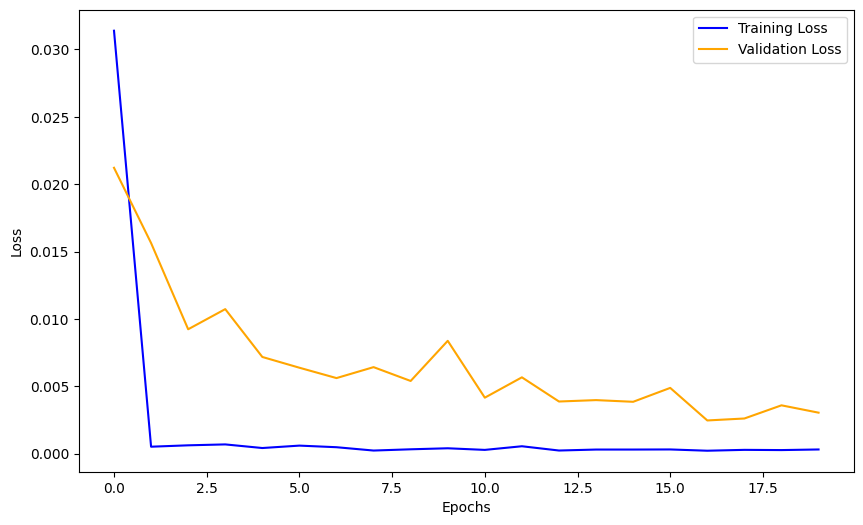

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Evaluate model

In [ ]:
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0114
Test Loss: 0.028654130175709724


prediction

In [ ]:
RNNpredictions = model.predict(X_test)
RNNpredictions = scaler.inverse_transform(RNNpredictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
RNNpredictions.shape

(394, 1)

Metrics measurements

In [ ]:
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
mse = mean_squared_error(actual, RNNpredictions)
mape = np.mean(np.abs((actual - RNNpredictions) / actual)) * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

Mean Squared Error (MSE): 474148.8897
Mean Absolute Percentage Error (MAPE): 2.2942%


visualize

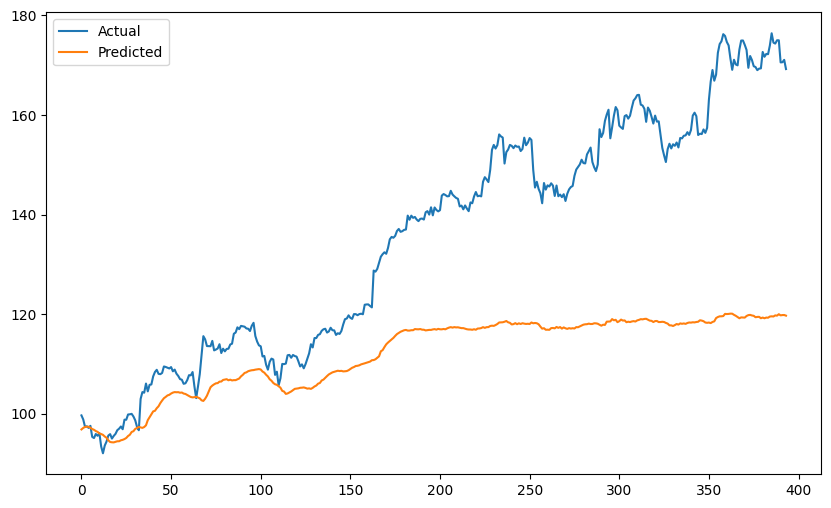

In [ ]:
import matplotlib.pyplot as plt
actual = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(actual, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
#LSTM MODEL
# Create the LSTM model
lst_model = Sequential()
lst_model.add(LSTM(units=200,  return_sequences=True,input_shape=(seq_length, 1)))
lst_model.add(LSTM(units=100 , return_sequences=True ))
lst_model.add(LSTM(units=50 , return_sequences=False ))
lst_model.add(Dense(units=1))

# Compile the model
lst_model.compile(optimizer='adam', loss='mean_squared_error')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
 # Train the model on the training set
start = time.time()
history = lst_model.fit(X_test, y_test,validation_data=(X_val, y_val),epochs=20, batch_size=50, verbose=1)
end = time.time()
print(f"Training time: {end - start} seconds")

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 701ms/step - loss: 0.2732 - val_loss: 0.0141
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 456ms/step - loss: 0.0239 - val_loss: 0.0216
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 425ms/step - loss: 0.0078 - val_loss: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 425ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 745ms/step - loss: 0.0034 - val_loss: 0.0045
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 405ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 713ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 417ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 700ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 427ms/step - loss: 7.6805e-04 - val_loss: 7.1551e-04
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 429ms/step - loss: 7.9302e-04 - val_loss: 6.6385e-04
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 559ms/step - loss

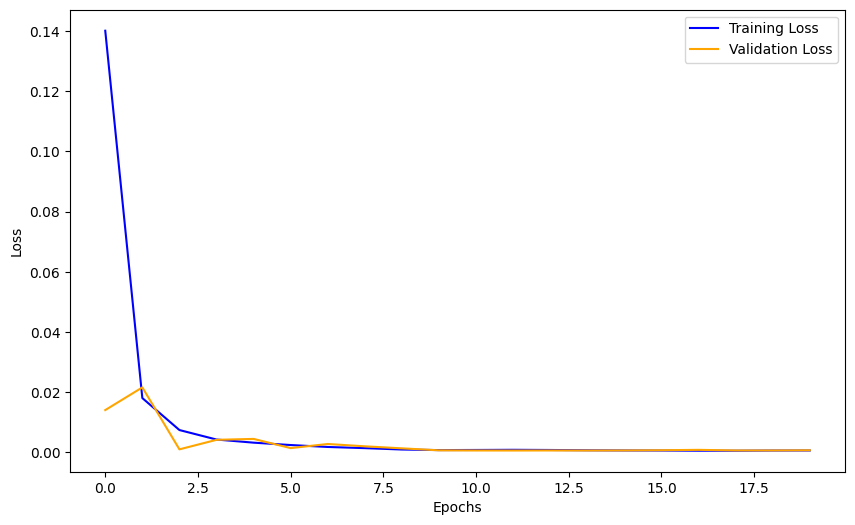

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = lst_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step


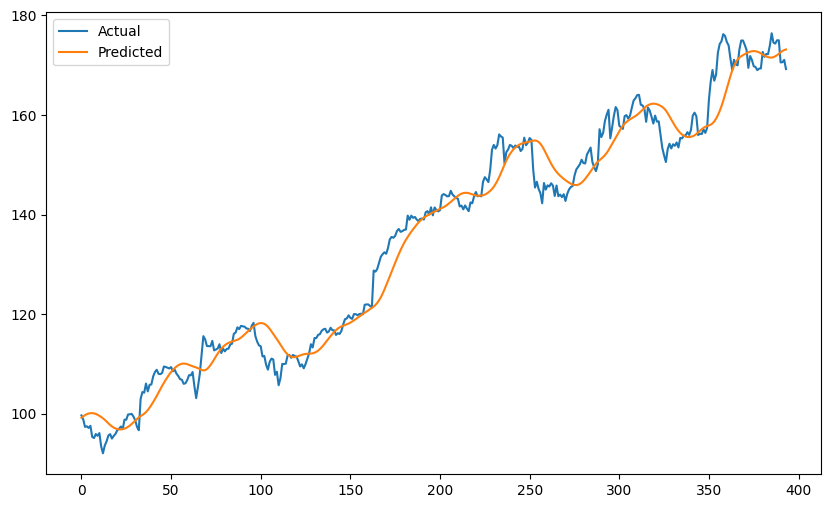

In [ ]:
actual = scaler.inverse_transform(y_test.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot
plt.plot(actual, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()

In [ ]:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
mse = mean_squared_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

Mean Squared Error (MSE): 16.5660
Mean Absolute Percentage Error (MAPE): 2.2950%


### WEEK 5 AUTOFORMER TRAINING


In [3]:
data = pd.read_csv("/content/AAPL_2006-01-01_to_2018-01-01 (1).csv", parse_dates=['Date'])
data.set_index('Date', inplace=True)

In [4]:
data = data[['Close']]

In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [6]:
train_size = int(len(scaled_data) * 0.70)
val_size = int(len(scaled_data) * 0.15)
train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size + val_size]
test_data = scaled_data[train_size + val_size:]

In [7]:
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(seq_length, len(data)):
        sequences.append(data[i-seq_length:i, 0])
        labels.append(data[i, 0])
    return np.array(sequences), np.array(labels)

In [8]:
seq_length = 60

In [9]:
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [10]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [11]:
import torch
import torch.nn as nn

class DecompositionBlock(nn.Module):
    def __init__(self, kernel_size=25):
        super(DecompositionBlock, self).__init__()
        self.moving_avg = nn.AvgPool1d(kernel_size=kernel_size, stride=1, padding=kernel_size // 2)

    def forward(self, x):
        trend = self.moving_avg(x.permute(0, 2, 1)).permute(0, 2, 1)  # Trend component
        seasonal = x - trend  # Seasonal component
        return seasonal, trend


class Autoformer(nn.Module):
    def __init__(self, input_dim, seq_length, d_model, n_heads, num_layers, kernel_size=25):
        super(Autoformer, self).__init__()
        self.encoder = nn.Linear(input_dim, d_model)
        self.decoder = nn.Linear(d_model, 1)

        # Decomposition layer
        self.decomposition = DecompositionBlock(kernel_size=kernel_size)

        # Transformer Encoder layers
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=n_heads, dim_feedforward=128),
            num_layers=num_layers,
        )

    def forward(self, x):
        # Decomposition
        seasonal, trend = self.decomposition(x)

        # Combine seasonal and trend for modeling
        x_encoded = self.encoder(seasonal + trend)

        # Transformer-based feature extraction
        transformer_out = self.transformer_encoder(x_encoded.permute(1, 0, 2))  # (seq_len, batch, d_model)

        # Decode the last step
        output = self.decoder(transformer_out[-1])  # Forecast only the last time step
        return output





In [12]:
# Model parameters
input_dim = 1
seq_length = 30
d_model = 64
n_heads = 4
num_layers = 2
kernel_size = 25

# Initialize Autoformer
autoformer_model = Autoformer(input_dim, seq_length, d_model, n_heads, num_layers, kernel_size)
# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move model to device
autoformer_model = autoformer_model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoformer_model.parameters(), lr=0.001)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Using device: cuda


Using device: cuda


In [13]:
# Training loop
# Store losses
train_losses = []
val_losses = []

num_epochs = 50
for epoch in range(num_epochs):
    autoformer_model.train()
    optimizer.zero_grad()

    # Convert X_train and y_train to PyTorch tensors and move to device
    # Ensure X_train and y_train are on the same device as the model
    X_train_gpu = torch.tensor(X_train, dtype=torch.float32, device=device)
    y_train_gpu = torch.tensor(y_train, dtype=torch.float32, device=device)

    # Forward pass
    output = autoformer_model(X_train_gpu)
    loss = criterion(output.squeeze(), y_train_gpu)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Evaluate the model
    autoformer_model.eval()
    with torch.no_grad():
        # Convert X_test to a PyTorch tensor
        X_val_tensor = torch.tensor(X_val, dtype=torch.float32, device=device)
        predictions = autoformer_model(X_val_tensor)

        # Convert y_test to a PyTorch tensor if it's not already
        y_val_tensor = torch.tensor(y_val, dtype=torch.float32, device=device) if not isinstance(y_test, torch.Tensor) else y_test

        test_loss = criterion(predictions.squeeze(), y_val_tensor.squeeze())
        val_losses.append(test_loss.item())
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 1/50, Loss: 0.1160
Epoch 2/50, Loss: 0.2518
Epoch 3/50, Loss: 0.0954
Epoch 4/50, Loss: 0.0308
Epoch 5/50, Loss: 0.0965
Epoch 6/50, Loss: 0.0978
Epoch 7/50, Loss: 0.0443
Epoch 8/50, Loss: 0.0133
Epoch 9/50, Loss: 0.0309
Epoch 10/50, Loss: 0.0525
Epoch 11/50, Loss: 0.0461
Epoch 12/50, Loss: 0.0236
Epoch 13/50, Loss: 0.0089
Epoch 14/50, Loss: 0.0151
Epoch 15/50, Loss: 0.0276
Epoch 16/50, Loss: 0.0303
Epoch 17/50, Loss: 0.0207
Epoch 18/50, Loss: 0.0092
Epoch 19/50, Loss: 0.0078
Epoch 20/50, Loss: 0.0144
Epoch 21/50, Loss: 0.0182
Epoch 22/50, Loss: 0.0167
Epoch 23/50, Loss: 0.0114
Epoch 24/50, Loss: 0.0060
Epoch 25/50, Loss: 0.0078
Epoch 26/50, Loss: 0.0116
Epoch 27/50, Loss: 0.0127
Epoch 28/50, Loss: 0.0106
Epoch 29/50, Loss: 0.0072
Epoch 30/50, Loss: 0.0058
Epoch 31/50, Loss: 0.0071
Epoch 32/50, Loss: 0.0092
Epoch 33/50, Loss: 0.0089
Epoch 34/50, Loss: 0.0072
Epoch 35/50, Loss: 0.0054
Epoch 36/50, Loss: 0.0056
Epoch 37/50, Loss: 0.0073
Epoch 38/50, Loss: 0.0074
Epoch 39/50, Loss: 0.

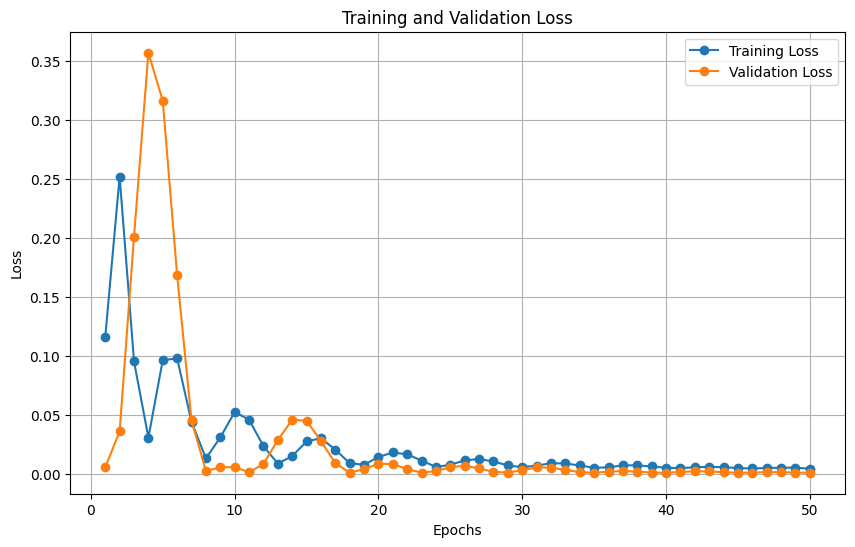

In [18]:
# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Evaluate the model
autoformer_model.eval()
with torch.no_grad():
    # Convert X_test to a PyTorch tensor
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
    predictions = autoformer_model(X_test_tensor)

    # Convert y_test to a PyTorch tensor if it's not already
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device) if not isinstance(y_test, torch.Tensor) else y_test

    test_loss = criterion(predictions.squeeze(), y_test_tensor.squeeze())
    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.0031


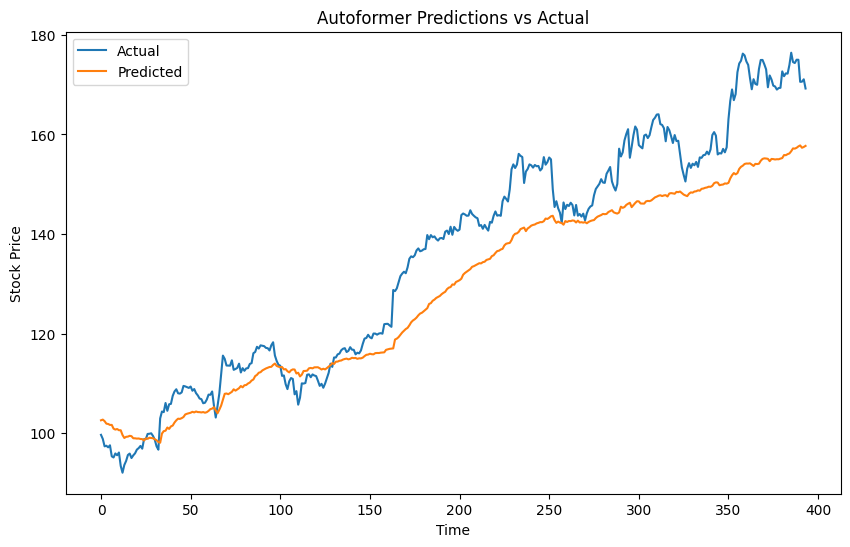

Mean Squared Error (MSE): 87.6625
Mean Absolute Percentage Error (MAPE): 5.3773%


In [23]:
# Convert predictions and actual values back to original scale
predictions = predictions.cpu().numpy() # Move predictions to CPU before converting to NumPy
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(actual, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.title("Autoformer Predictions vs Actual")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

# Calculate and print MSE and MAPE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(actual, predictions)
mape = np.mean(np.abs((actual - predictions) / actual)) * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

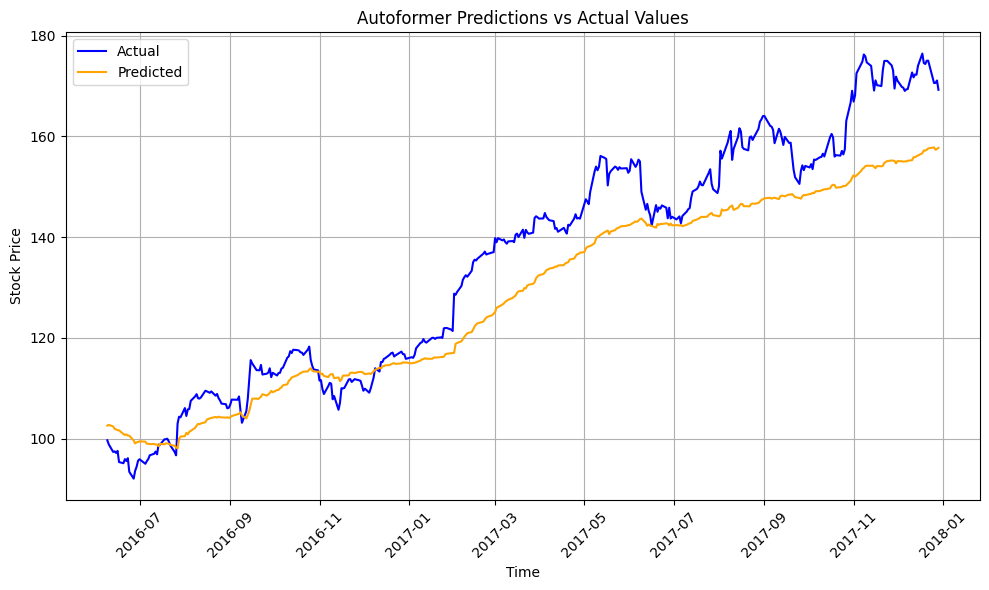

Mean Squared Error (MSE): 87.6625
Mean Absolute Percentage Error (MAPE): 5.3773%


In [24]:
# Extract timestamps corresponding to the test set
test_timestamps = data.index[-len(y_test):]  # Last timestamps matching the test set size

# Plot the predictions against the actual values with timestamps
plt.figure(figsize=(10, 6))
plt.plot(test_timestamps, actual, label="Actual", color='blue')
plt.plot(test_timestamps, predictions, label="Predicted", color='orange')
plt.legend()
plt.title("Autoformer Predictions vs Actual Values")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and display error metrics
mse = mean_squared_error(actual, predictions)
mape = np.mean(np.abs((actual - predictions) / actual)) * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


<ipython-input-25-d5df265874c5>:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_mse = results_df.resample('Q').apply(lambda x: mean_squared_error(x['Actual'], x['Predicted']))
<ipython-input-25-d5df265874c5>:15: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_mape = results_df.resample('Q').apply(lambda x: np.mean(np.abs((x['Actual'] - x['Predicted']) / x['Actual'])) * 100)


Quarterly MSE:
Date
2016-06-30     26.727112
2016-09-30     17.257792
2016-12-31      9.191804
2017-03-31    101.938774
2017-06-30     87.284411
2017-09-30    106.684280
2017-12-31    220.437567
Freq: QE-DEC, dtype: float64

Quarterly MAPE:
Date
2016-06-30    5.266409
2016-09-30    3.401476
2016-12-31    2.325481
2017-03-31    6.853003
2017-06-30    5.648684
2017-09-30    5.905304
2017-12-31    8.212553
Freq: QE-DEC, dtype: float64


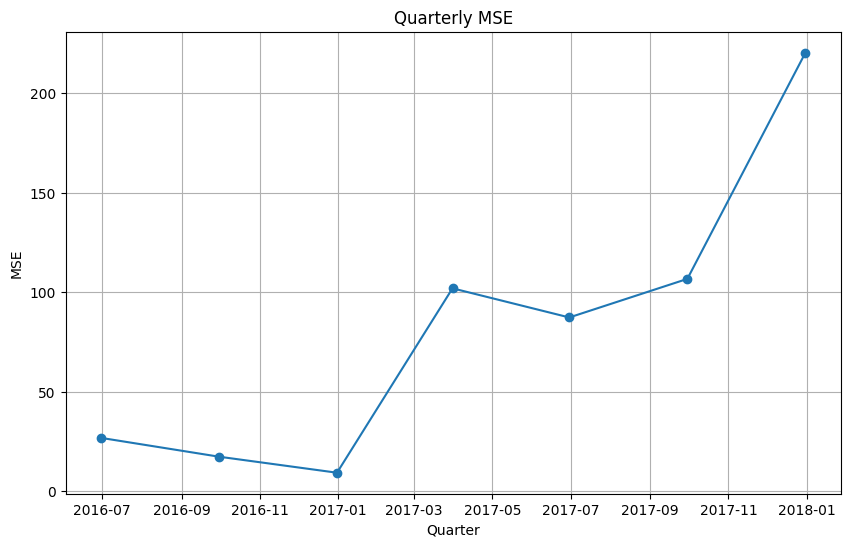

In [25]:
# Extract timestamps corresponding to the test set
test_timestamps = data.index[-len(y_test):]

# Create a DataFrame for actual and predicted values with timestamps
results_df = pd.DataFrame({'Actual': actual.flatten(), 'Predicted': predictions.flatten()}, index=test_timestamps)

# Resample the DataFrame to 3-month intervals and calculate MSE for each period
quarterly_mse = results_df.resample('Q').apply(lambda x: mean_squared_error(x['Actual'], x['Predicted']))

# Print the quarterly MSE values
print("Quarterly MSE:")
print(quarterly_mse)

# You can also calculate other metrics like MAPE for each quarter if needed
quarterly_mape = results_df.resample('Q').apply(lambda x: np.mean(np.abs((x['Actual'] - x['Predicted']) / x['Actual'])) * 100)
print("\nQuarterly MAPE:")
print(quarterly_mape)

# Plot the quarterly MSE or MAPE values
plt.figure(figsize=(10, 6))
plt.plot(quarterly_mse.index, quarterly_mse.values, marker='o', linestyle='-')
plt.title("Quarterly MSE")
plt.xlabel("Quarter")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

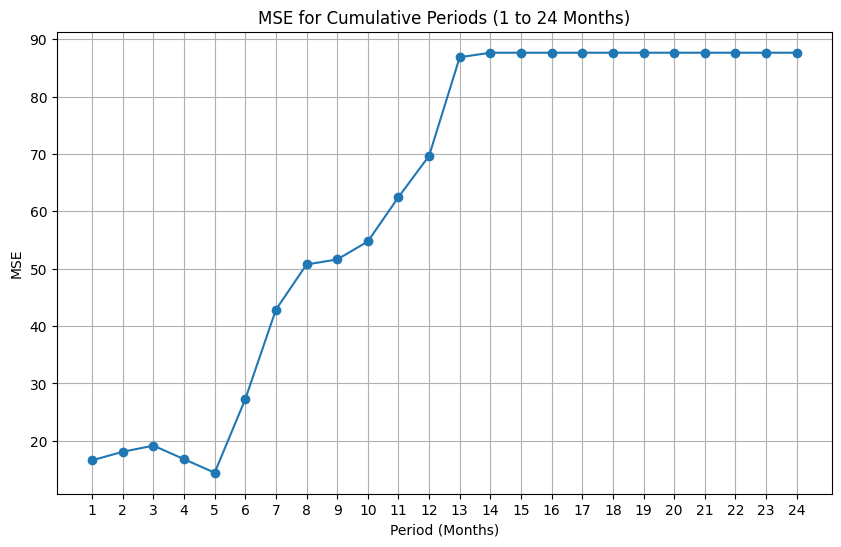

In [29]:
# Extract timestamps corresponding to the test set
test_timestamps = data.index[-len(y_test):]

# Create a DataFrame for actual and predicted values with timestamps
results_df = pd.DataFrame({'Actual': actual.flatten(), 'Predicted': predictions.flatten()}, index=test_timestamps)

# Define the periods (in months)
periods = list(range(1, 25))  # 1 to 24 months

# Calculate MSE for cumulative periods
mse_values = []
for period in periods:
    # Get data for the cumulative period
    cumulative_data = results_df.iloc[:period * 30]  # Assuming 30 days per month approximately

    # Calculate MSE for the cumulative period
    mse = mean_squared_error(cumulative_data['Actual'], cumulative_data['Predicted'])
    mse_values.append(mse)

# Plot the MSE values for cumulative periods
plt.figure(figsize=(10, 6))
plt.plot(periods, mse_values, marker='o', linestyle='-')
plt.title("MSE for Cumulative Periods (1 to 24 Months)")
plt.xlabel("Period (Months)")
plt.ylabel("MSE")
plt.grid(True)
plt.xticks(periods)  # Set x-axis ticks to show all periods
plt.show()

In [ ]:
class TransformerModel(nn.Module):
    def __init__(self, input_dim, seq_length, d_model, n_heads, num_layers):
        super(TransformerModel, self).__init__()
        self.encoder = nn.Linear(input_dim, d_model)
        self.transformer = nn.Transformer(
            d_model=d_model,
            nhead=n_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers
        )
        self.decoder = nn.Linear(d_model, 1)

    def forward(self, src, tgt):
        src = self.encoder(src)
        tgt = self.encoder(tgt)
        transformer_out = self.transformer(src.permute(1, 0, 2), tgt.permute(1, 0, 2))
        return self.decoder(transformer_out.permute(1, 0, 2)[:, -1, :])



In [ ]:
import torch.optim as optim

In [ ]:
# Model parameters
input_dim = 1
d_model = 64
n_heads = 8
num_layers = 2

transformer_model = TransformerModel(input_dim, seq_length, d_model, n_heads, num_layers)
transformer_model = transformer_model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(transformer_model.parameters(), lr=0.001)


In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    transformer_model.train()
    optimizer.zero_grad()

    # Convert X_train and y_train to PyTorch tensors and move to the same device as the model
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device)

    output = transformer_model(X_train_tensor, X_train_tensor)  # Pass tensors to the model
    loss = criterion(output.squeeze(), y_train_tensor.squeeze())
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

OutOfMemoryError: CUDA out of memory. Tried to allocate 964.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 647.06 MiB is free. Process 250035 has 14.11 GiB memory in use. Of the allocated memory 13.92 GiB is allocated by PyTorch, and 64.99 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Test Loss: 0.0627


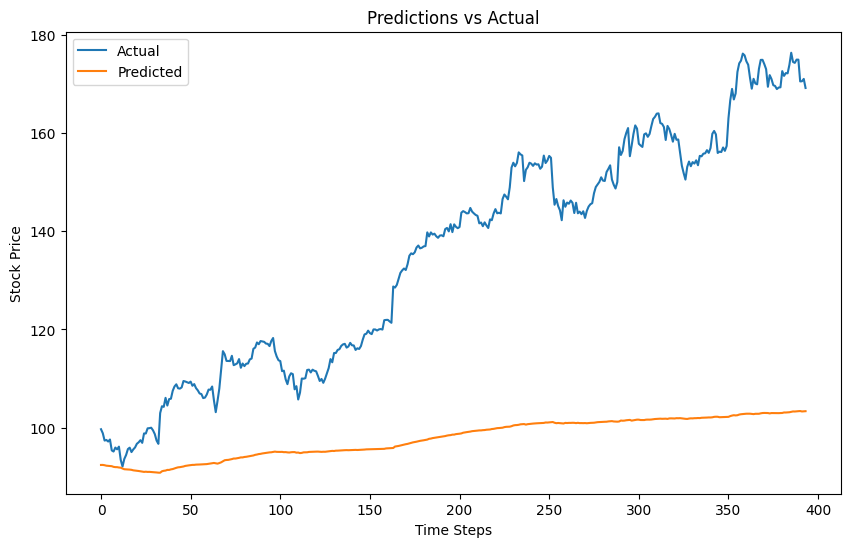

In [ ]:

# Evaluate the model
transformer_model.eval()
with torch.no_grad():
    # Convert X_test to a PyTorch tensor
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
    # Provide both src and tgt arguments to the forward method.
    # In this case, we're using X_test_tensor for both,
    # but you might need to adjust based on your specific use case.
    predictions = transformer_model(X_test_tensor, X_test_tensor)

    # Convert y_test to a PyTorch tensor if it's not already
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device) if not isinstance(y_test, torch.Tensor) else y_test

    test_loss = criterion(predictions.squeeze(), y_test_tensor.squeeze())
    print(f"Test Loss: {test_loss.item():.4f}")

# Move predictions to the CPU and convert to NumPy array
predictions = predictions.cpu().detach().numpy()
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# ... (your plotting code)
plt.figure(figsize=(10, 6))
plt.plot(actual, label="Actual")
plt.plot(predictions, label="Predicted")  # Now using the NumPy array
plt.legend()
plt.title("Predictions vs Actual")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.show()